In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from acquire import get_titanic_data
from acquire import get_iris_data
from prepare import prep_titanic_data
from prepare import prep_iris


df = prep_titanic_data(get_titanic_data())

# Logistic Regression


In [2]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,3
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,3
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,3
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,3


In [3]:
df.dropna(inplace=True)

In [4]:
le = preprocessing.LabelEncoder()
le.fit(df['sex'])
df['sex_encode'] = le.transform(df['sex'])
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode,sex_encode
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,3,1
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,3,0
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,3,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,3,1


In [5]:
train, test = train_test_split(df, random_state= 123)


In [6]:
scaler = MinMaxScaler()
scaler.fit(train[['age', 'fare']])

train[['age', 'fare']] = scaler.transform(train[['age', 'fare']])
test[['age', 'fare']] = scaler.transform(test[['age', 'fare']])

In [7]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode,sex_encode
86,86,0,3,male,0.195778,1,3,0.067096,S,Third,Southampton,0,3,1
184,184,1,3,female,0.044986,0,2,0.042990,S,Third,Southampton,0,3,0
406,406,0,3,male,0.635587,0,0,0.015127,S,Third,Southampton,1,3,1
285,285,0,3,male,0.409399,0,0,0.016908,C,Third,Cherbourg,1,0,1
591,591,1,1,female,0.648153,1,0,0.152766,C,First,Cherbourg,0,0,0


In [8]:
# Logistic Regression
 
# Fit the logistic regression classifier to your training sample and transform, 
# i.e. make predictions on the training sample

logit = LogisticRegression()

logit_fit = logit.fit(train[['pclass','age','fare','sibsp','parch', 'sex_encode']], train.survived)


In [9]:
y_pred = logit.predict(train[['pclass','age','fare','sibsp','parch', 'sex_encode']])

y_pred


array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [10]:
y_pred_proba = logit.predict_proba(train[['pclass','age','fare','sibsp','parch', 'sex_encode']])

y_pred_proba


array([[0.82927821, 0.17072179],
       [0.27654945, 0.72345055],
       [0.90932007, 0.09067993],
       ...,
       [0.30450696, 0.69549304],
       [0.88193022, 0.11806978],
       [0.65268962, 0.34731038]])

In [11]:
train['prediction'] = logit.predict(train[['pclass','age','fare','sibsp','parch', 'sex_encode']])
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode,sex_encode,prediction
86,86,0,3,male,0.195778,1,3,0.067096,S,Third,Southampton,0,3,1,0
184,184,1,3,female,0.044986,0,2,0.042990,S,Third,Southampton,0,3,0,1
406,406,0,3,male,0.635587,0,0,0.015127,S,Third,Southampton,1,3,1,0
285,285,0,3,male,0.409399,0,0,0.016908,C,Third,Cherbourg,1,0,1,0
591,591,1,1,female,0.648153,1,0,0.152766,C,First,Cherbourg,0,0,0,1


In [12]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(train[['pclass','age','fare','sibsp','parch', 'sex_encode']], train.survived)))


Accuracy of Logistic Regression classifier on training set: 0.79


In [13]:
confusion_matrix(train.survived, train.prediction)


array([[269,  47],
       [ 64, 155]])

In [14]:
cm = pd.DataFrame(confusion_matrix(train.survived, train.prediction),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])

cm

,Pred -,Pred +
Actual -,269,47
Actual +,64,155


In [15]:
print(classification_report(train.survived, train.prediction))


              precision    recall  f1-score   support

           0       0.81      0.85      0.83       316
           1       0.77      0.71      0.74       219

   micro avg       0.79      0.79      0.79       535
   macro avg       0.79      0.78      0.78       535
weighted avg       0.79      0.79      0.79       535



In [16]:
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logit.score(train[['pclass','age','fare','sibsp','parch', 'sex_encode']], train.survived)))


Accuracy of Logistic Regression classifier on test set: 0.79


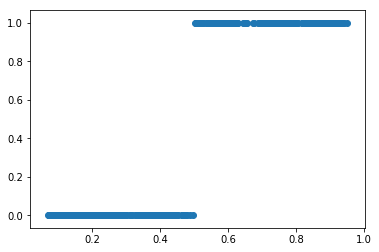

In [17]:
y_pred_proba = [i[1] for i in y_pred_proba]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_pred_proba, y_pred)


Which performs better on your in-sample data?

- all came back as 0.79

# Decision Tree


### Iris Data

In [18]:
iris_df = prep_iris(get_iris_data())

In [19]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [20]:
X = iris_df.drop(['species', 'species_encoded'],axis=1)
y = iris_df[['species']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)


In [21]:
clf = DecisionTreeClassifier(criterion='entropy')
tree_fit = clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)

y_pred[:5]

array(['virginica', 'virginica', 'versicolor', 'setosa', 'setosa'],
      dtype=object)

In [22]:
y_pred_proba = clf.predict_proba(X_train)

y_pred_proba[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [23]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))


Accuracy of Decision Tree classifier on training set: 1.00


In [24]:
confusion_matrix(y_train, y_pred)


array([[32,  0,  0],
       [ 0, 40,  0],
       [ 0,  0, 33]])

In [25]:
sorted(y_train.species.unique())


['setosa', 'versicolor', 'virginica']

In [26]:
y_train.species.value_counts()


versicolor    40
virginica     33
setosa        32
Name: species, dtype: int64

In [27]:
labels = sorted(y_train.species.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)


,setosa,versicolor,virginica
setosa,32,0,0
versicolor,0,40,0
virginica,0,0,33


In [28]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       1.00      1.00      1.00        40
   virginica       1.00      1.00      1.00        33

   micro avg       1.00      1.00      1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [29]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


Accuracy of Decision Tree classifier on test set: 0.93


In [30]:
from sklearn.datasets import load_iris

# iris = load_iris()
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(iris.data, iris.target)

# import graphviz

# from graphviz import Graph

# dot_data = tree.export_graphviz(clf, out_file=None) 
# graph = graphviz.Source(dot_data) 

# graph.render('iris_decision_tree2', view=True)


## Titanic Data

In [31]:
train_X_Titanic = train[['pclass','age','fare','sibsp','parch', 'sex_encode']]
train_y_Titanic = train[['survived']]

test_X_Titanic = test[['pclass','age','fare','sibsp','parch', 'sex_encode']]
test_y_Titanic = test[['survived']]

In [81]:
clf_Titanic = DecisionTreeClassifier(max_depth=4, criterion='entropy')
tree_fit_Titanic = clf_Titanic.fit(train_X_Titanic, train_y_Titanic)
y_pred_Titanic = clf_Titanic.predict(train_X_Titanic)


In [82]:
y_pred_proba_Titanic = clf_Titanic.predict_proba(train_X_Titanic)

y_pred_proba_Titanic[:5]

array([[1.        , 0.        ],
       [0.4137931 , 0.5862069 ],
       [0.89150943, 0.10849057],
       [0.89150943, 0.10849057],
       [0.01449275, 0.98550725]])

In [83]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf_Titanic.score(train_X_Titanic, train_y_Titanic)))

Accuracy of Decision Tree classifier on training set: 0.84


In [84]:
cm = pd.DataFrame(confusion_matrix(train_y_Titanic, y_pred_Titanic),
             columns=['Pred Death', 'Pred Life'], index=['Died', 'Lived'])

cm

,Pred Death,Pred Life
Died,285,31
Lived,53,166


In [85]:
print(classification_report(train_y_Titanic, y_pred_Titanic))


              precision    recall  f1-score   support

           0       0.84      0.90      0.87       316
           1       0.84      0.76      0.80       219

   micro avg       0.84      0.84      0.84       535
   macro avg       0.84      0.83      0.83       535
weighted avg       0.84      0.84      0.84       535



In [86]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf_Titanic.score(test_X_Titanic, test_y_Titanic)))

Accuracy of Decision Tree classifier on test set: 0.82


# KNN


#### KNN Titanic

In [38]:
from sklearn.neighbors import KNeighborsClassifier


In [39]:
knn = KNeighborsClassifier(n_neighbors=12, weights='uniform')
knn_fit = knn.fit(train_X_Titanic, train_y_Titanic)
y_pred_knn = knn.predict(train_X_Titanic)
y_pred_knn[:5]

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


array([0, 1, 0, 0, 1])

In [40]:
y_pred_proba_knn = knn.predict_proba(train_X_Titanic)
y_pred_proba_knn[:5]

array([[0.58333333, 0.41666667],
       [0.25      , 0.75      ],
       [0.91666667, 0.08333333],
       [0.91666667, 0.08333333],
       [0.        , 1.        ]])

In [41]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(train_X_Titanic, train_y_Titanic)))


Accuracy of KNN classifier on training set: 0.82


In [42]:
print(confusion_matrix(train_y_Titanic, y_pred_knn))


[[293  23]
 [ 75 144]]


In [43]:
print(classification_report(train_y_Titanic, y_pred_knn))


              precision    recall  f1-score   support

           0       0.80      0.93      0.86       316
           1       0.86      0.66      0.75       219

   micro avg       0.82      0.82      0.82       535
   macro avg       0.83      0.79      0.80       535
weighted avg       0.82      0.82      0.81       535



In [44]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(test_X_Titanic, test_y_Titanic)))

Accuracy of KNN classifier on test set: 0.83


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/anaconda3/lib/pyt

([<matplotlib.axis.XTick at 0x1a245fddd8>,
 <a list of 5 Text xticklabel objects>)

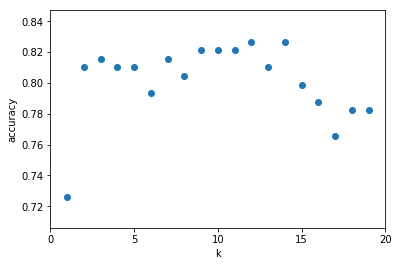

In [45]:

import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_X_Titanic, train_y_Titanic)
    scores.append(knn.score(test_X_Titanic, test_y_Titanic))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

- With 5 it is 81% 
- With 10 it is 82%
- With 20 it is 79%

- Looks like 12 and 14 have the best fit with 83%
- 12 has 437 accurate and 14 has 432

### KNN Iris

In [46]:
knn_iris = KNeighborsClassifier()
knn_iris.fit(X_train, y_train)
y_pred_knn_iris = knn_iris.predict(X_train)
y_pred_proba_knn_iris = knn_iris.predict_proba(X_train)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [47]:
y_pred_knn_iris[:5]

array(['virginica', 'virginica', 'versicolor', 'setosa', 'setosa'],
      dtype=object)

In [48]:
y_pred_proba_knn_iris[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [49]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn_iris.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.98


In [61]:
print(confusion_matrix(y_train, y_pred_knn_iris))


[[32  0  0]
 [ 0 39  1]
 [ 0  1 32]]


In [62]:
print(classification_report(y_train, y_pred_knn_iris))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       0.97      0.97      0.97        40
   virginica       0.97      0.97      0.97        33

   micro avg       0.98      0.98      0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105



In [63]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn_iris.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.98


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.

([<matplotlib.axis.XTick at 0x1a250f35f8>,
 <a list of 5 Text xticklabel objects>)

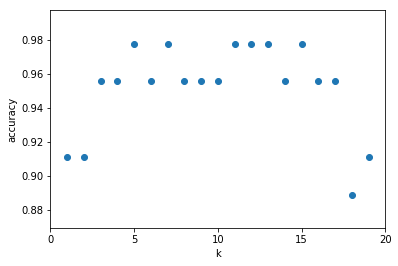

In [64]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn_iris = KNeighborsClassifier(n_neighbors = k)
    knn_iris.fit(X_train, y_train)
    scores.append(knn_iris.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])


# Random Forest


#### RF Titanic

In [50]:
from sklearn.ensemble import RandomForestClassifier


In [51]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=2,
                            n_estimators=100,
                            max_depth=15, 
                            random_state=123)

forest_fit = rf.fit(train_X_Titanic, train_y_Titanic)
y_pred_rf = rf.predict(train_X_Titanic)
y_pred_proba_rf = rf.predict_proba(train_X_Titanic)


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [52]:
print(train_X_Titanic.columns, '\n', rf.feature_importances_)


Index(['pclass', 'age', 'fare', 'sibsp', 'parch', 'sex_encode'], dtype='object') 
 [0.10780571 0.22422708 0.24764116 0.04780443 0.03126569 0.34125595]


In [53]:
y_pred_rf[:5]

array([0, 1, 0, 0, 1])

In [54]:
y_pred_proba_rf[:5]

array([[0.88205681, 0.11794319],
       [0.30666667, 0.69333333],
       [0.98550834, 0.01449166],
       [0.97105834, 0.02894166],
       [0.01666667, 0.98333333]])

In [55]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(train_X_Titanic, train_y_Titanic)))


Accuracy of random forest classifier on training set: 0.92


In [56]:
print(confusion_matrix(train_y_Titanic, y_pred_rf))


[[303  13]
 [ 29 190]]


In [57]:
print(classification_report(train_y_Titanic, y_pred_rf))


              precision    recall  f1-score   support

           0       0.91      0.96      0.94       316
           1       0.94      0.87      0.90       219

   micro avg       0.92      0.92      0.92       535
   macro avg       0.92      0.91      0.92       535
weighted avg       0.92      0.92      0.92       535



In [58]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(test_X_Titanic, test_y_Titanic)))

Accuracy of random forest classifier on test set: 0.85


- With min_samples_leaf = 1 and max_depth = 20, 0.80
- With min_samples_leaf = 5 and max_depth = 3, 0.77
- With min_samples_leaf = 2 and max_depth = 15, 0.85


#### RF Iris

In [72]:
rf_iris = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=2,
                            n_estimators=100,
                            max_depth=15, 
                            random_state=123)

rf_iris.fit(X_train, y_train)
y_pred_rf_iris = rf_iris.predict(X_train)
y_pred_proba_rf_iris = rf_iris.predict_proba(X_train)


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [73]:
y_pred_rf_iris[:5]

array(['virginica', 'virginica', 'versicolor', 'setosa', 'setosa'],
      dtype=object)

In [74]:
y_pred_proba_rf_iris[:5]

array([[0.        , 0.06119048, 0.93880952],
       [0.        , 0.        , 1.        ],
       [0.        , 0.9835    , 0.0165    ],
       [1.        , 0.        , 0.        ],
       [0.99      , 0.01      , 0.        ]])

In [76]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf_iris.score(X_train, y_train)))


Accuracy of random forest classifier on training set: 0.97


In [78]:
print(confusion_matrix(y_train, y_pred_rf_iris))


[[32  0  0]
 [ 0 38  2]
 [ 0  1 32]]


In [79]:
print(classification_report(y_train, y_pred_rf_iris))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       0.97      0.95      0.96        40
   virginica       0.94      0.97      0.96        33

   micro avg       0.97      0.97      0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



In [80]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf_iris.score(X_test, y_test)))


Accuracy of random forest classifier on test set: 0.96


In [87]:
5 + 5

10